In [1]:
! pip install bigartm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 788.2 kB/s eta 0:00:00


In [2]:
import artm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from numpy import array

import re
import string

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
fetch_20newsgroups().data[0]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

#### Проверим работу библиотеки с помощью простой модели

In [4]:
cv = CountVectorizer(max_features=10000, stop_words='english')

In [5]:
n_wd = array(cv.fit_transform(fetch_20newsgroups().data).todense()).T

In [7]:
vocabulary = cv.get_feature_names_out()
vocabulary[:5], len(vocabulary)

(array(['00', '000', '005', '01', '02'], dtype=object), 10000)

In [8]:
bv = artm.BatchVectorizer(data_format='bow_n_wd',
                          n_wd=n_wd,
                          vocabulary=vocabulary)

/usr/local/lib/python3.9/dist-packages/artm/batches_utils.py:227: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix


In [9]:
bv

artm.BatchVectorizer(data_path="urnuuidf0b4dcd0-e465-11ed-bcda-0242ac1c000c", num_batches=12)

In [10]:
# Learn simple LDA model (or you can use artm.pLSA or advanced artm.ARTM)
model = artm.LDA(num_topics=25, dictionary=bv.dictionary)

In [11]:
model.fit_offline(bv, num_collection_passes=20)

In [12]:
# Print results
model.get_top_tokens()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['windows',
  'card',
  'scsi',
  'edu',
  'com',
  'mac',
  'lines',
  'use',
  'pc',
  'subject'],
 ['key',
  'encryption',
  'chip',
  'clipper',
  'com',
  'keys',
  'use',
  'government',
  'security',
  'public'],
 ['uk',
  'car',
  'com',
  'ac',
  'ca',
  'organization',
  'lines',
  'writes',
  'article',
  'subject'],
 ['president',
  'mr',
  'people',
  'government',
  'think',
  'clinton',
  'new',
  'going',
  'money',
  'said'],
 ['god',
  'people',
  'jesus',
  'believe',
  'christian',
  'does',
  'think',
  'don',
  'bible',
  'say'],
 ['00', '10', '15', '16', 'apr', '25', '11', '12', '1993', '20'],
 ['science',
  'edu',
  'subject',
  'theory',
  'earth',
  'time',
  'like',
  'book',
  'scientific',
  'organization'],
 ['ax', 'max', 'g9v', 'b8f', 'a86', 'pl', '145', '1d9', '1t', '0t'],
 ['nl', 'bh', 'al', 'ah', 'sg', 'ingr', 'mu', 'air', 'mm', 'p2'],
 ['edu',
  'organization',
  'lines',
  'subject',
  'institute',
  'technology',
  'michael',
  'university',
  'nnt

#### Усложним задачу

Подготовим данные

In [13]:
netflix_df = pd.read_csv('/content/Netflix.csv')

In [23]:
netflix_df.shape

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(8807, 12)

In [14]:
netflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [15]:
df = netflix_df[(netflix_df['type'] == 'Movie') & netflix_df['description'].notnull()]

In [16]:
df.shape

(6131, 12)

In [17]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [18]:
df.loc[122, ['description']].values

array(['After embarking on an affair with the cop probing the murder of a young woman, an insular schoolteacher suspects her lover was involved in the crime.'],
      dtype=object)

Сейчас нам потребуются описания к фильмам и их описания.

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
filename_valid = ('/content/drive/My Drive/topicmodeling/texts_valid.vw.txt')
filename_train = ('/content/drive/My Drive/topicmodeling/texts_train.vw.txt')

In [21]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re

from tqdm import tqdm
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
df[df['release_year'] == 1982]['description'].values[0]

'In a smog-choked dystopian Los Angeles, blade runner Rick Deckard is called out of retirement to snuff a quartet of escaped "replicants."'

In [23]:
word_tokenize('In a smog-choked dystopian Los Angeles, blade runner Rick Deckard is called out of retirement to snuff a quartet of escaped "replicants."')

['In',
 'a',
 'smog-choked',
 'dystopian',
 'Los',
 'Angeles',
 ',',
 'blade',
 'runner',
 'Rick',
 'Deckard',
 'is',
 'called',
 'out',
 'of',
 'retirement',
 'to',
 'snuff',
 'a',
 'quartet',
 'of',
 'escaped',
 '``',
 'replicants',
 '.',
 "''"]

In [31]:
s = 'In a smog-choked dystopian Los Angeles, blade runner Rick Deckard is called out of retirement to snuff a quartet of escaped "replicants."'

print(word_tokenize(s))
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(w).lower() for w in word_tokenize(s) if w not in string.punctuation and w not in ("''", '``')]
print(tokens)

text = ' '.join(w for w in tokens \
                        if w not in stopwords.words('english') \
                        and w not in ("''", '``'))
print(text)

['In', 'a', 'smog-choked', 'dystopian', 'Los', 'Angeles', ',', 'blade', 'runner', 'Rick', 'Deckard', 'is', 'called', 'out', 'of', 'retirement', 'to', 'snuff', 'a', 'quartet', 'of', 'escaped', '``', 'replicants', '.', "''"]
['in', 'a', 'smog-choked', 'dystopian', 'los', 'angeles', 'blade', 'runner', 'rick', 'deckard', 'is', 'called', 'out', 'of', 'retirement', 'to', 'snuff', 'a', 'quartet', 'of', 'escaped', 'replicants']
smog-choked dystopian los angeles blade runner rick deckard called retirement snuff quartet escaped replicants


In [62]:
import string


counter_train = 0
counter_valid = 0

lemmatizer = WordNetLemmatizer()

with open(filename_valid, 'w') as fout_valid,\
 open(filename_train, 'w') as fout_train:
    for i, raw in tqdm(df.iterrows(), total=df.shape[0]):
        text = ...
        label = raw['release_year']

        # TODO будем добавлять каждый 100й текст в валидационную выборку, всё остальное пойдёт на обучение
        # данные добавляются в следующем формате:
        # doc_{counter_val} {text} |@year class_{label}

100%|██████████| 6131/6131 [00:25<00:00, 236.95it/s]


In [63]:
! head -2 /content/drive/My\ Drive/topicmodeling/texts_train.vw.txt

doc_0 father nears end life filmmaker kirsten johnson stage death inventive comical way help face inevitable |@year class_2020
doc_1 equestria 's divided bright-eyed hero belief earth ponies pegasi unicorns pal hoof heart determined prove |@year class_2021


In [64]:
! wc -l /content/drive/My\ Drive/topicmodeling/texts_train.vw.txt

6011 /content/drive/My Drive/topicmodeling/texts_train.vw.txt


In [65]:
! wc -l /content/drive/My\ Drive/topicmodeling/texts_valid.vw.txt

119 /content/drive/My Drive/topicmodeling/texts_valid.vw.txt


In [66]:
bv_train = artm.BatchVectorizer(
    data_path=filename_train, data_format='vowpal_wabbit', batch_size=100, 
    target_folder='/content/drive/My Drive/topicmodeling/vw_batches/batches_train')

bv_test = artm.BatchVectorizer(
    data_path=filename_valid, data_format='vowpal_wabbit', batch_size=100, 
    target_folder='/content/drive/My Drive/topicmodeling/vw_batches/batches_valid')

In [67]:
dictionary = artm.Dictionary()
dictionary.gather(data_path='/content/drive/My Drive/topicmodeling/vw_batches/batches_train')
dictionary

artm.Dictionary(name=5b4a1ebc-355f-4615-9f90-2323d2dfc184, num_entries=15123)

In [79]:
model = artm.ARTM(num_topics=100,
                  dictionary=dictionary, 
                  class_ids={'@default_class': 1.0, 
                             '@year': 10.0})

model.scores.add(artm.PerplexityScore(name='perplexity', dictionary=dictionary))
model.scores.add(artm.TopTokensScore(name='top-tokens', num_tokens=15))
model.scores.add(artm.SparsityPhiScore(name='sparsity', class_id='@year'))

model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='decorr', tau=10000, 
                                                      class_ids=['@default_class', '@year']))
# model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='smooth', tau=10, 
#                                                       class_ids=['@default_class', '@year']))

In [80]:
iterator = tqdm(range(25), total=25)
for i in iterator:
    model.fit_offline(bv_train, num_collection_passes=1)
    iterator.set_postfix({'perplexity': model.score_tracker['perplexity'].value[-1],  
                          'sparsity': model.score_tracker['sparsity'].value[-1],})

100%|██████████| 25/25 [00:26<00:00,  1.05s/it, perplexity=6.48e+3, sparsity=1]


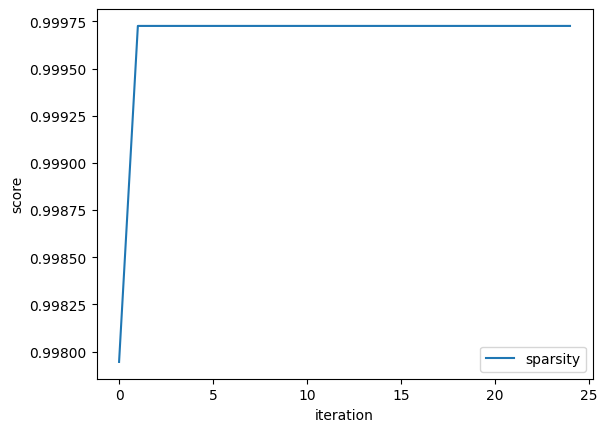

In [81]:
plt.plot(model.score_tracker['sparsity'].value, label = 'sparsity')
plt.legend(loc = 'best')

plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

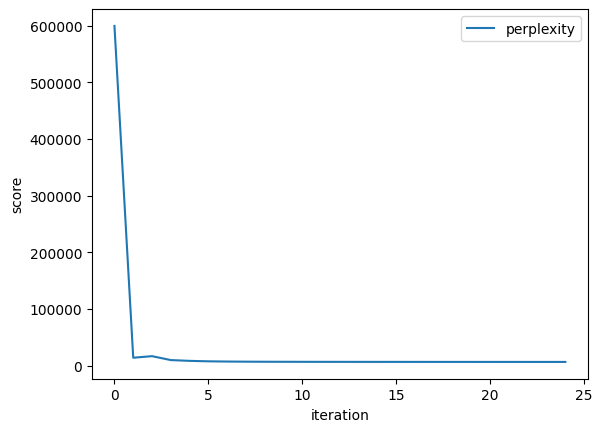

In [82]:
plt.plot(model.score_tracker['perplexity'].value, label = 'perplexity')
plt.legend(loc = 'best')

plt.xlabel('iteration')
plt.ylabel('score')
plt.show()

In [83]:
top_tokens = model.score_tracker['top-tokens'].last_tokens

for topic_name in model.topic_names:
    print(top_tokens[topic_name])

['identity', 'desperate', 'scheme', 'island', 'lover', 'kill', 'strange', 'newly', 'great', 'difference', 'engaged', 'millionaire', 'serving', 'unusual', 'state']
['demon', 'law', 'act', 'tragic', 'extraordinary', 'animated', 'handsome', 'call', 'voice', 'priest', 'charismatic', 'sudden', 'dying', 'simple', 'person']
['challenge', 'use', 'park', 'professional', 'george', 'greatest', 'super', 'really', 'accepts', 'unfolds', 'wave', 'toy', 'monsters', 'rediscover', 'dysfunctional']
['stay', 'looking', 'mexican', 'recently', 'loved', 'healing', 'deceased', 'racial', 'dedicated', 'terror', 'wood', 'appears', 'week', 'arrested', 'injustice']
['across', 'santa', 'hero', 'north', 'kidnapping', 'deliver', 'outlaw', 'service', 'west', 'helping', 'sense', 'trek', 'ransom', 'monkey', 'claus']
['follows', 'soldier', 'classic', 'threat', 'survival', 'turned', 'clue', 'upside', 'program', 'modern-day', 'cocaine', 'abduction', 'guardian', 'fugitive', 'wounded']
['travel', 'summer', 'even', 'heist', '

Давайте узнаем, в каком году и о чём больше всего снимали кино? :)

In [84]:
year_modal = []
with open('/content/drive/My Drive/topicmodeling/texts_train.vw.txt') as f:
    for line in tqdm(f):
        year = re.search(r'@year class_(\d\d\d\d)', line).group(1)
        year_modal.append(year.strip())

year_modal = np.array(year_modal)
unique_modal = np.unique(year_modal)

6011it [00:00, 339715.17it/s]


In [85]:
predict = model.transform(bv_train)

In [86]:
predict.head()

,2400,2401,2402,2403,2404,2405,2406,2407,2408,2409,...,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699
topic_0,0.000000e+00,0.0,0.045455,0.0,0.000000,0.0,6.561932e-09,0.0,0.0,0.000000e+00,...,1.059053e-15,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
topic_1,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,1.047198e-05,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,3.787616e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.000002
topic_2,2.334895e-09,0.0,0.000000,0.0,0.000000,0.0,3.728538e-02,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,1.663849e-12,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
topic_3,0.000000e+00,0.0,0.000000,0.0,0.000000,0.0,0.000000e+00,0.0,0.0,3.208960e-08,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000132
topic_4,0.000000e+00,0.0,0.000000,0.0,0.066667,0.0,0.000000e+00,0.0,0.0,0.000000e+00,...,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [87]:
mean_vectors = ...
mean_vectors = np.array(mean_vectors)

100%|██████████| 73/73 [00:00<00:00, 1336.75it/s]


In [88]:
mean_vectors.shape

(73, 100)

In [90]:
for modal_id, topic_id in ...:
    print(unique_modal[modal_id], ', '.join(top_tokens[model.topic_names[topic_id]]))

1942 lord, danger, ”, african, “, also, japan, secretly, james, castle, decision, forest, prepares, theater, lady
1942 power, wealthy, john, younger, raising, turning, lot, observation, divorced, strict, household, disguise, mistakenly, kennedy, secure
1943 heart, discover, accident, animal, framed, complex, horse, ill, commit, held, near, captive, terminally, ocean, controversy
1943 best, move, drama, tell, los, angeles, widow, bollywood, asks, reunion, hearing, athlete, situation, disease, refuse
1943 taking, ii, intimate, fighter, resort, training, threatened, rocky, attorney, france, australian, warsaw, klub, hybrydy, triumph
1943 character, book, undercover, iconic, name, suspicious, concert, jewish, avoid, document, recount, complete, novel, aftermath, refugee
1944 bos, inside, seeking, including, photographer, think, skill, part, tested, apartment, found, abandoned, increasingly, villager, perfect
1944 king, explore, owner, bheem, space, center, la, shark, match, halloween, figh

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
